# **Project 3D Velodyne points to 2D camera Image** 
***

## Dataset
[KITTI 2011_09_26_drive_0005 dataset](http://www.cvlibs.net/datasets/kitti/raw_data.php?type=city)  
In this code, rectified image is used.

refer to [KITTI Dataset Paper](http://www.cvlibs.net/publications/Geiger2013IJRR.pdf) for the details of data measurement environment

## Objective

Project Velodyne points(model : HDL-64E) to 2D camera Image.  
  

# Process
  
***  

For converting coordinate systems, there are several steps.  
To help your understanding, I made a simple slide. The codes below are proceeding as these steps.  
  
  

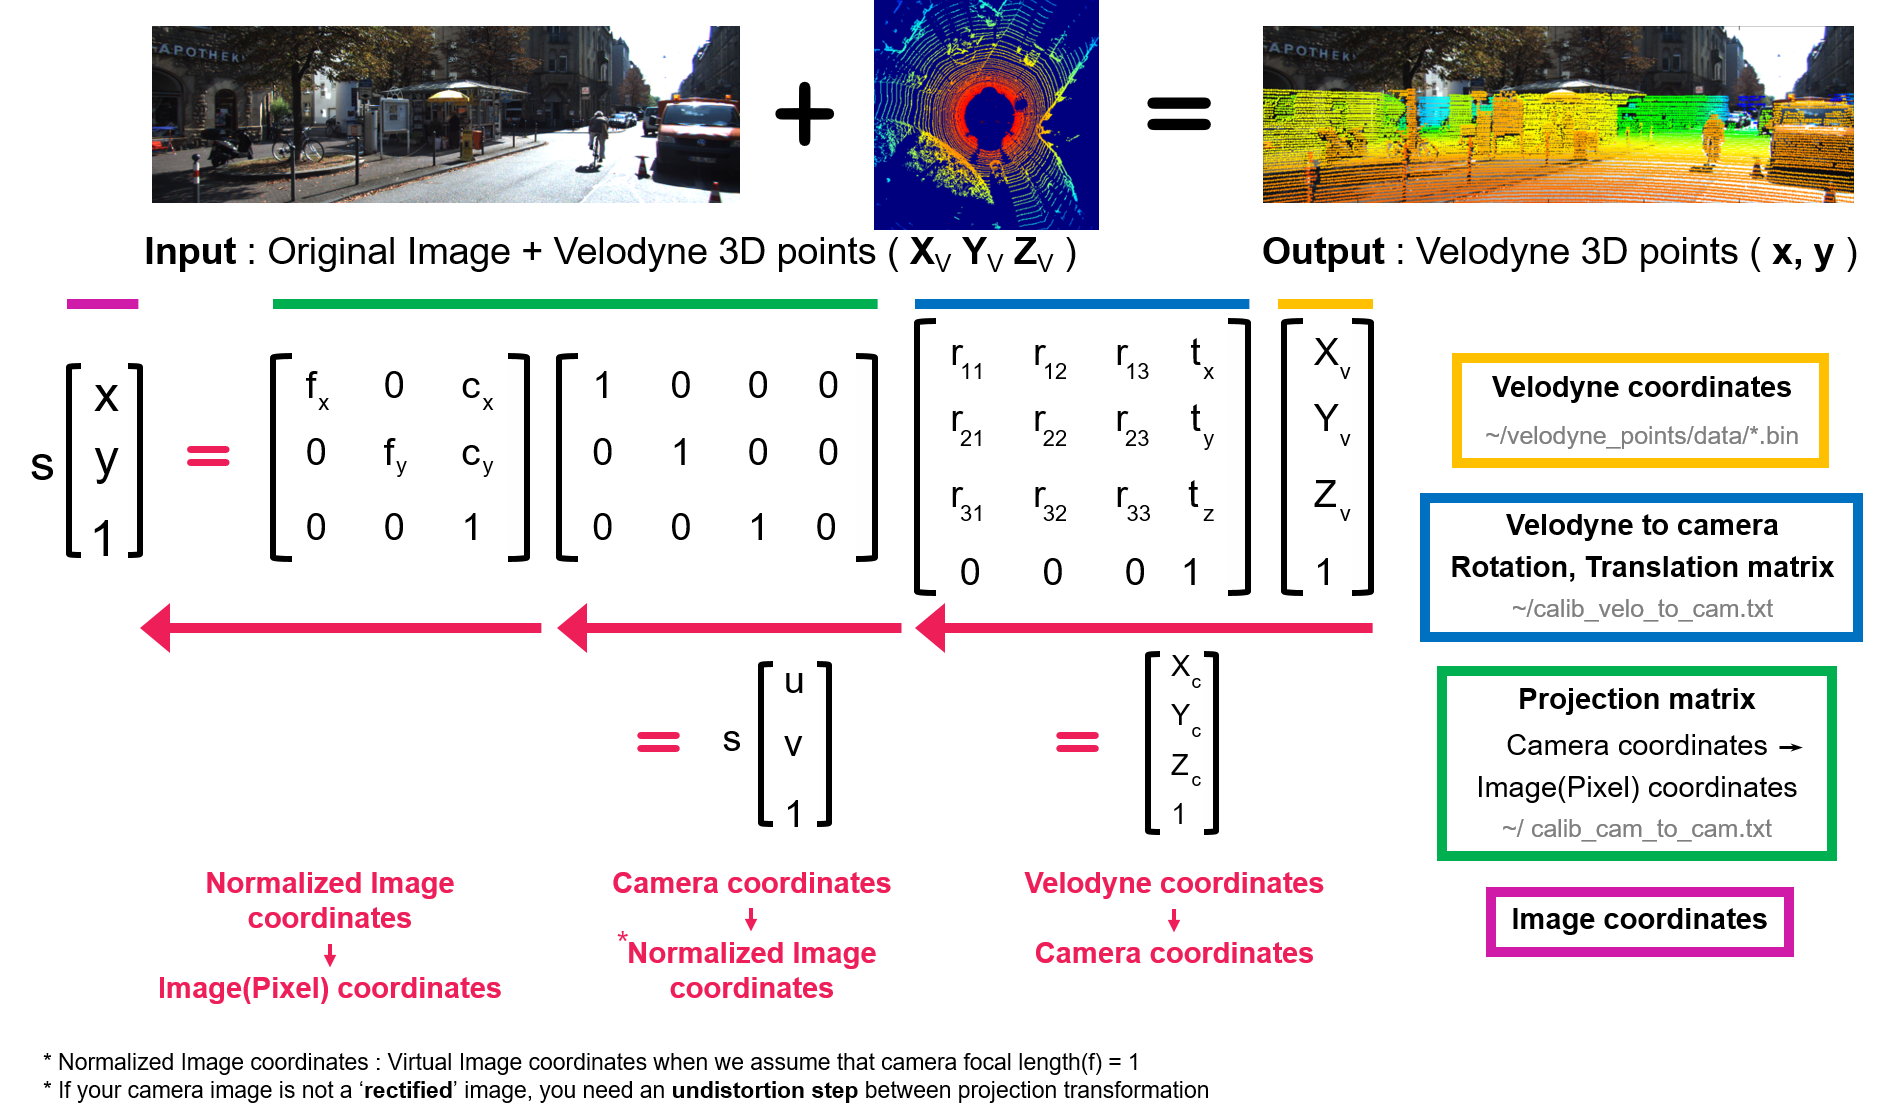

In [2]:
Image(filename='./process.png')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kitti_foundation import Kitti, Kitti_util
%matplotlib inline

import matplotlib.image as mpimg
import cv2
import os 

In [2]:
#image0 = np.ones(image.shape)
#image0 = np.full(image.shape, 255, np.uint8)
#plt.imshow(image0)
#print(image0.shape)

In [3]:
    def print_projection_pc(points, color, image):
        #hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        image0 = np.full(image.shape, 255, np.uint8)
        
        hsv_image = cv2.cvtColor(image0, cv2.COLOR_BGR2HSV)
        
        for i in range(points.shape[1]):
            image1 = cv2.circle(hsv_image, (int(points[0][i]), int(points[1][i])), 2, (int(color[i]), 255, 255), -1)

        return cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)
    
    def print_projection_plt(points, color, image):
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        for i in range(points.shape[1]):
            cv2.circle(hsv_image, (int(points[0][i]), int(points[1][i])), 2, (int(color[i]), 255, 255), -1)

        return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

file size : 10


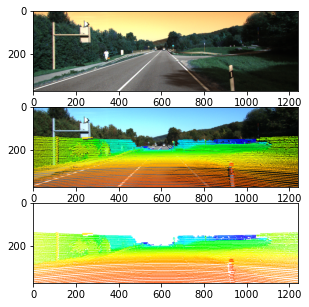

In [5]:
image_path = './new_dataset/training/image_2'
velo_path = './new_dataset/training/velodyne'

file_list = os.listdir(image_path)

v_fov, h_fov = (-24.9, 2.0), (-90, 90)

v2c_filepath = './calibration/calib_velo_to_cam.txt'
c2c_filepath = './calibration/calib_cam_to_cam.txt'

print("file size :", len(file_list))

# print frame #5 camera image
i=5

res = Kitti_util(frame=i, camera_path=image_path, velo_path=velo_path, \
                v2c_path=v2c_filepath, c2c_path=c2c_filepath)

img, pnt, c_ = res.velo_projection_frame(v_fov=v_fov, h_fov=h_fov)
result1 = print_projection_plt(pnt, c_, img)
result2 = print_projection_pc(pnt, c_, img)


fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(3, 1, 1)
ax1.imshow(img)

ax2 = fig.add_subplot(3, 1, 2)
ax2.imshow(result1)

ax3 = fig.add_subplot(3, 1, 3)
ax3.imshow(result2)

## Auto Save

### train set

In [6]:
""" save one frame about projecting velodyne points into camera image """
image_type = 'color'  # 'gray' or 'color' image
mode = '02' # if image_type == 'gray' else '02'  # image_00 = 'graye image' , image_02 = 'color image'

image_path = './new_dataset/training/image_2'
velo_path = './new_dataset/training/velodyne'

file_list = os.listdir(image_path)

v_fov, h_fov = (-24.9, 2.0), (-90, 90)

v2c_filepath = './calibration/calib_velo_to_cam.txt'
c2c_filepath = './calibration/calib_cam_to_cam.txt'

print("file size :", len(file_list))

i=0
while i < len(file_list):
    print(i)
    res = Kitti_util(frame=i, camera_path=image_path, velo_path=velo_path, \
                v2c_path=v2c_filepath, c2c_path=c2c_filepath)

    img, pnt, c_ = res.velo_projection_frame(v_fov=v_fov, h_fov=h_fov)
    result = print_projection_pc(pnt, c_, img)

    # display result image
    #plt.subplots(1,1, figsize = (13,3) )
    #plt.title("Velodyne points to camera image Result")
    #plt.imshow(result)
    # save the result image
    text=str(i)
    cv2.imwrite('./new_dataset/training/image_results/'+ text.zfill(6)+'.png',result)
    i=i+1

file size : 10
0
1
2
3
4
5
6
7
8
9


### test set

In [7]:
""" save one frame about projecting velodyne points into camera image """
image_type = 'color'  # 'gray' or 'color' image
mode = '02' # if image_type == 'gray' else '02'  # image_00 = 'graye image' , image_02 = 'color image'

image_path = './new_dataset/testing/image_2'
velo_path = './new_dataset/testing/velodyne'

file_list = os.listdir(image_path)

v_fov, h_fov = (-24.9, 2.0), (-90, 90)

v2c_filepath = './calibration/calib_velo_to_cam.txt'
c2c_filepath = './calibration/calib_cam_to_cam.txt'

print("file size :", len(file_list))

i=0
while i < len(file_list):
    print(i)
    res = Kitti_util(frame=i, camera_path=image_path, velo_path=velo_path, \
                v2c_path=v2c_filepath, c2c_path=c2c_filepath)

    img, pnt, c_ = res.velo_projection_frame(v_fov=v_fov, h_fov=h_fov)
    result = print_projection_pc(pnt, c_, img)

    # display result image
    #plt.subplots(1,1, figsize = (13,3) )
    #plt.title("Velodyne points to camera image Result")
    #plt.imshow(result)
    # save the result image
    text=str(i)
    cv2.imwrite('./new_dataset/testing/image_results/'+ text.zfill(6)+'.png',result)
    i=i+1

file size : 10
0
1
2
3
4
5
6
7
8
9
